In [3]:
using BifurcationKit, LinearAlgebra, Plots, Parameters, Setfield

const BK = BifurcationKit

N(x; a = 0.5, b = 0.01) = 1 + (x + a*x^2)/(1 + b*x^2)

N (generic function with 1 method)

In [4]:
function F_chan(x, p)
	@unpack α, β = p
	f = similar(x)
	n = length(x)
	f[1] = x[1] - β
	f[n] = x[n] - β
	for i=2:n-1
		f[i] = (x[i-1] - 2 * x[i] + x[i+1]) * (n-1)^2 + α * N(x[i], b = β)
	end
	return f
end	

F_chan (generic function with 1 method)

In [22]:
n = 101
sol = [(i-1)*(n-i)/n^2+0.1 for i=1:n]

# set of parameters
par = (α = 3.3, β = 0.01)

(α = 3.3, β = 0.01)

In [23]:
optnewton = NewtonPar(tol = 1e-11, verbose = true)

NewtonPar{Float64, DefaultLS, DefaultEig{typeof(real)}}
  tol: Float64 1.0e-11
  maxIter: Int64 50
  α: Float64 1.0
  αmin: Float64 0.001
  verbose: Bool true
  linesearch: Bool false
  linsolver: DefaultLS
  eigsolver: DefaultEig{typeof(real)}


In [24]:
out, _, _ = @time newton( F_chan, sol, par, optnewton)


┌────────────────────-────────────────────────────────┐
│ Newton Iterations      f(x)      Linear Iterations  │
├─────────────┐──────────────────────┐────────────────┤
│       0     │       2.3440e+01     │        0       │
│       1     │       1.3774e+00     │        1       │
│       2     │       1.6265e-02     │        1       │
│       3     │       2.4488e-06     │        1       │
│       4     │       3.2499e-11     │        1       │
│       5     │       6.4963e-12     │        1       │
└─────────────┴──────-───────────────┴────────────────┘
  0.084331 seconds (2.38 k allocations: 2.557 MiB)


([0.01, 0.03720652412223214, 0.06407054185093598, 0.09058273986587079, 0.11673369427685464, 0.14251388370903345, 0.1679137026057851, 0.1929234747339689, 0.21753346687515773, 0.24173390268545755  …  0.24173390268545822, 0.21753346687515834, 0.19292347473396945, 0.1679137026057856, 0.14251388370903387, 0.11673369427685497, 0.09058273986587105, 0.06407054185093615, 0.03720652412223222, 0.01], [23.439763883009064, 1.3773825610091686, 0.016265056935340638, 2.4488271731851063e-6, 3.249920993417237e-11, 6.496338510943468e-12], true, 5, 5)

In [25]:
optcont = ContinuationPar(dsmin = 0.01, dsmax = 0.15, ds= 0.01, pMax = 4.1, newtonOptions = NewtonPar(tol = 1e-9))

ContinuationPar{Float64, DefaultLS, DefaultEig{typeof(real)}}
  dsmin: Float64 0.01
  dsmax: Float64 0.15
  ds: Float64 0.01
  theta: Float64 0.5
  doArcLengthScaling: Bool false
  gGoal: Float64 0.5
  gMax: Float64 0.8
  thetaMin: Float64 0.001
  a: Float64 0.5
  tangentFactorExponent: Float64 1.5
  pMin: Float64 -1.0
  pMax: Float64 4.1
  maxSteps: Int64 100
  finDiffEps: Float64 1.0e-9
  newtonOptions: NewtonPar{Float64, DefaultLS, DefaultEig{typeof(real)}}
  η: Float64 150.0
  saveToFile: Bool false
  saveSolEveryStep: Int64 0
  nev: Int64 3
  saveEigEveryStep: Int64 1
  saveEigenvectors: Bool true
  plotEveryStep: Int64 10
  precisionStability: Float64 1.0e-10
  detectFold: Bool true
  detectBifurcation: Int64 0
  dsminBisection: Float64 1.0e-16
  nInversion: Int64 2
  maxBisectionSteps: Int64 15
  tolBisectionEigenvalue: Float64 1.0e-16
  detectEvent: Int64 0
  tolParamBisectionEvent: Float64 1.0e-16
  detectLoop: Bool false


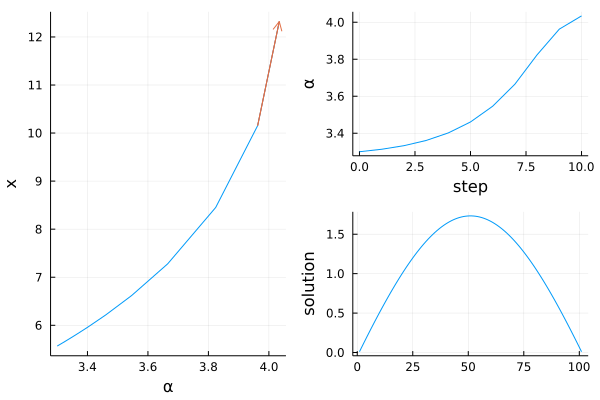

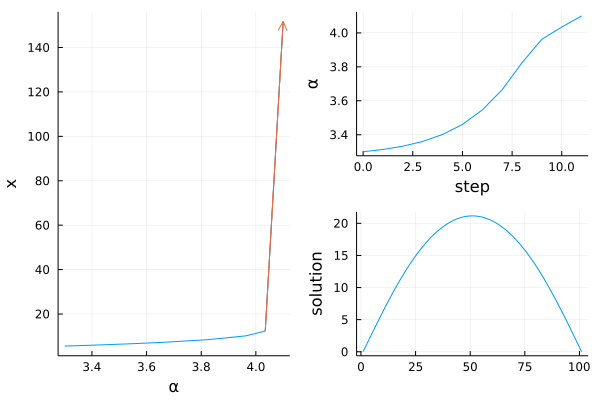

  1.779548 seconds (4.84 M allocations: 266.881 MiB, 4.10% gc time, 84.90% compilation time)


(Branch number of points: 12
Branch of Equilibrium
Type of vectors: Vector{Float64}
Parameters α from 3.3 to 4.1
, BorderedArray{Vector{Float64}, Float64}([0.01, 0.7107187174234681, 1.4106344752699762, 2.109173188724941, 2.8056008490525475, 3.4990562615064067, 4.18858742798182, 4.873187833607486, 5.551829591189834, 6.223491449811543  …  6.2234914498115605, 5.55182959118985, 4.8731878336075, 4.188587427981832, 3.4990562615064174, 2.805600849052556, 2.109173188724948, 1.4106344752699809, 0.7107187174234705, 0.01], 4.1), BorderedArray{Vector{Float64}, Float64}([0.0, 0.06564628722075178, 0.1312546806213362, 0.1967691847733932, 0.26211760429120023, 0.3272148772671196, 0.39196678010133296, 0.4562736222612195, 0.5200336203510278, 0.5831457481914779  …  0.5831457481914787, 0.5200336203510283, 0.4562736222612198, 0.39196678010133335, 0.32721487726712, 0.2621176042912005, 0.19676918477339345, 0.13125468062133638, 0.06564628722075187, 0.0], 0.0066908389192474275))

In [26]:
br, _ = @time continuation(F_chan, out, par, (@lens _.α),
		optcont; plot = true, verbosity = 0,
		plotSolution = (x, p; kwargs...) -> (plot!(x;ylabel="solution",label="", kwargs...)))

In [27]:
using ForwardDiff

# Jacobian of F_chan
Jac_mat = (x,p) -> ForwardDiff.jacobian(z -> F_chan(z,p),x)

# index of the Fold bifurcation point in br.bifpoint
indfold = 2

outfold, _, flag = newton(F_chan, Jac_mat,br, indfold, par, (@lens _.α))
flag && printstyled(color=:red, "--> We found a Fold Point at α = ", outfold.p, ", β = 0.01, from ", br.foldpoint[indfold][3],"\n")

LoadError: MethodError: no method matching newton(::typeof(F_chan), ::var"#31#33", ::ContResult{NamedTuple{(:x, :param, :itnewton, :itlinear, :ds, :theta, :n_unstable, :n_imag, :stable, :step), Tuple{Float64, Float64, Int64, Int64, Float64, Float64, Int64, Int64, Nothing, Int64}}, Nothing, Nothing, BifurcationKit.SpecialPoint{Float64, NamedTuple{(:x,), Tuple{Float64}}, Vector{Float64}}, Nothing, Nothing, NamedTuple{(:α, :β), Tuple{Float64, Float64}}, Setfield.PropertyLens{:α}}, ::Int64, ::NamedTuple{(:α, :β), Tuple{Float64, Float64}}, ::Setfield.PropertyLens{:α})
[0mClosest candidates are:
[0m  newton(::Any, ::Any, ::BifurcationKit.AbstractBranchResult, ::Int64; Jᵗ, d2F, normN, options, startWithEigen, issymmetric, kwargs...) at C:\Users\Hp\.julia\packages\BifurcationKit\Yvq7p\src\codim2\codim2.jl:27
[0m  newton(::Any, ::Any, ::vectype, ::Any, [91m::NewtonPar{T, S, E}[39m, [91m::DeflationOperator{T, Tf, vectype}[39m) where {T, Tf, vectype, S, E} at C:\Users\Hp\.julia\packages\BifurcationKit\Yvq7p\src\DeflationOperator.jl:172
[0m  newton(::Any, ::Any, ::vectype, ::Any, [91m::NewtonPar{T, S, E}[39m, [91m::DeflationOperator{T, Tf, vectype}[39m, [91m::DeflatedLinearSolver[39m; kwargs...) where {T, Tf, vectype, S, E} at C:\Users\Hp\.julia\packages\BifurcationKit\Yvq7p\src\DeflationOperator.jl:172
[0m  ...

In [28]:
optcontfold = ContinuationPar(dsmin = 0.001, dsmax = 0.05,ds= 0.01, pMax = 4.1, pMin = 0.)
	outfoldco, _, _ = @time continuation(
		F_chan, Jac_mat,
		br, indfold, 
		# set of parameters and 2 parameter axis to trace to codim 2 curve
		par, (@lens _.α), (@lens _.β),
		plot = true, verbosity = 2, optcontfold)
plot(outfoldco; xlabel="beta", ylabel="alpha")

LoadError: MethodError: no method matching continuation(::typeof(F_chan), ::var"#31#33", ::ContResult{NamedTuple{(:x, :param, :itnewton, :itlinear, :ds, :theta, :n_unstable, :n_imag, :stable, :step), Tuple{Float64, Float64, Int64, Int64, Float64, Float64, Int64, Int64, Nothing, Int64}}, Nothing, Nothing, BifurcationKit.SpecialPoint{Float64, NamedTuple{(:x,), Tuple{Float64}}, Vector{Float64}}, Nothing, Nothing, NamedTuple{(:α, :β), Tuple{Float64, Float64}}, Setfield.PropertyLens{:α}}, ::Int64, ::NamedTuple{(:α, :β), Tuple{Float64, Float64}}, ::Setfield.PropertyLens{:α}, ::Setfield.PropertyLens{:β}, ::ContinuationPar{Float64, DefaultLS, DefaultEig{typeof(real)}}; plot=true, verbosity=2)
[0mClosest candidates are:
[0m  continuation(::Any, ::Any, ::Tv, ::Any, [91m::Tv[39m, [91m::Real[39m, ::Lens, ::ContinuationPar; linearAlgo, kwargs...) where Tv at C:\Users\Hp\.julia\packages\BifurcationKit\Yvq7p\src\bifdiagram\BranchSwitching.jl:6
[0m  continuation(::Any, ::Any, ::BifurcationKit.AbstractBranchResult, ::Int64, [91m::Lens[39m) at C:\Users\Hp\.julia\packages\BifurcationKit\Yvq7p\src\codim2\codim2.jl:67[91m got unsupported keyword arguments "plot", "verbosity"[39m
[0m  continuation(::Any, ::Any, ::BifurcationKit.AbstractBranchResult, ::Int64, [91m::Lens[39m, [91m::ContinuationPar[39m; startWithEigen, issymmetric, Jᵗ, d2F, d3F, detectCodim2Bifurcation, kwargs...) at C:\Users\Hp\.julia\packages\BifurcationKit\Yvq7p\src\codim2\codim2.jl:67
[0m  ...

In [30]:
## Problem is in continuation paramters and Deflation operators. Same error - typeof , float and integer.
# Varying n of newton parameter? Affect on bifurcation and iterations?